# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nadi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | copala
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | bandarbeyla
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | kaoma
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | mhamid
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | balsas
Processing Record 16 of Set 1 | kloulklubed
Processing Record 17 of Set 1 | taltal
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | smithers
Processing Record 21 of Set 1 | chapada dos guimaraes
Processing Record 22 of Set 1 | ciudad lazaro car

Processing Record 39 of Set 4 | vadso
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | tanki leendert
City not found. Skipping...
Processing Record 43 of Set 4 | mushie
Processing Record 44 of Set 4 | san antonio de pale
Processing Record 45 of Set 4 | bottrop
Processing Record 46 of Set 4 | tofol
Processing Record 47 of Set 4 | luis correia
Processing Record 48 of Set 4 | haiku-pauwela
Processing Record 49 of Set 4 | kerikeri
Processing Record 0 of Set 5 | enshi
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | napanee
Processing Record 3 of Set 5 | ko pha ngan
Processing Record 4 of Set 5 | qamdo
Processing Record 5 of Set 5 | margate
Processing Record 6 of Set 5 | bati
Processing Record 7 of Set 5 | nata
Processing Record 8 of Set 5 | lihue
Processing Record 9 of Set 5 | luderitz
Processing Record 10 of Set 5 | brisas de zicatela
Processing Record 11 of Set 5 | san andres
Processing R

Processing Record 31 of Set 8 | geraldton
Processing Record 32 of Set 8 | diamantino
Processing Record 33 of Set 8 | gadzhiyevo
Processing Record 34 of Set 8 | arraial do cabo
Processing Record 35 of Set 8 | nkowakowa
Processing Record 36 of Set 8 | kaga bandoro
Processing Record 37 of Set 8 | caluula
Processing Record 38 of Set 8 | pasuquin
Processing Record 39 of Set 8 | caleta de carquin
Processing Record 40 of Set 8 | borba
Processing Record 41 of Set 8 | iwanai
Processing Record 42 of Set 8 | fisterra
Processing Record 43 of Set 8 | desarmes
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | coahuayana de hidalgo
Processing Record 46 of Set 8 | ouesso
Processing Record 47 of Set 8 | ilebo
Processing Record 48 of Set 8 | boende
Processing Record 49 of Set 8 | natal
Processing Record 0 of Set 9 | bulanash
Processing Record 1 of Set 9 | jamai
Processing Record 2 of Set 9 | abbeville
Processing Record 3 of Set 9 | sinabang
Processing Record 4 of Set 9 | swako

Processing Record 20 of Set 12 | san patricio
Processing Record 21 of Set 12 | mercedes
Processing Record 22 of Set 12 | sherbrooke
Processing Record 23 of Set 12 | namie
Processing Record 24 of Set 12 | aginskoye
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | tsengel
Processing Record 27 of Set 12 | wattegama
Processing Record 28 of Set 12 | chernomorskoye
Processing Record 29 of Set 12 | madaoua
Processing Record 30 of Set 12 | rancho palos verdes
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 33 of Set 12 | scarborough
Processing Record 34 of Set 12 | mahina
Processing Record 35 of Set 12 | kimbe
Processing Record 36 of Set 12 | pimentel
Processing Record 37 of Set 12 | pemangkat
Processing Record 38 of Set 12 | boone
Processing Record 39 of Set 12 | sinjai
Processing Record 40 of Set 12 | kerema
Processing Record 41 of Set 12 | nakasongola
Processing Record 42 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nadi,-17.8000,177.4167,26.00,83,40,0.00,FJ,1692134548
1,adamstown,-25.0660,-130.1015,20.26,61,17,9.51,PN,1692134548
2,afaahiti,-17.7500,-149.2833,25.93,79,83,7.41,PF,1692134549
3,copala,16.6500,-98.9833,29.55,70,100,3.75,MX,1692134549
4,iqaluit,63.7506,-68.5145,9.85,76,20,5.66,CA,1692134550


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadi,-17.8000,177.4167,26.00,83,40,0.00,FJ,1692134548
1,adamstown,-25.0660,-130.1015,20.26,61,17,9.51,PN,1692134548
2,afaahiti,-17.7500,-149.2833,25.93,79,83,7.41,PF,1692134549
3,copala,16.6500,-98.9833,29.55,70,100,3.75,MX,1692134549
4,iqaluit,63.7506,-68.5145,9.85,76,20,5.66,CA,1692134550


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

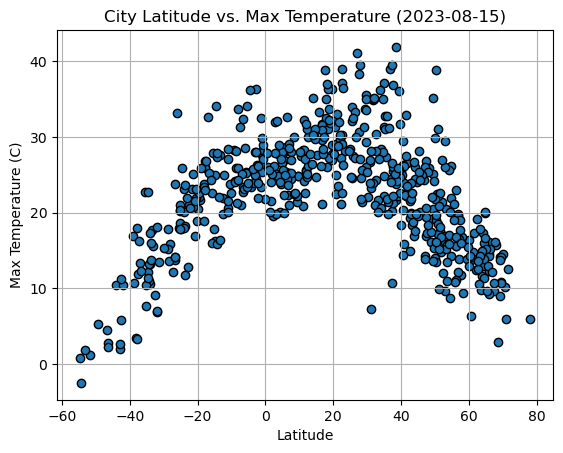

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

plt.scatter(latitude, temperature, edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

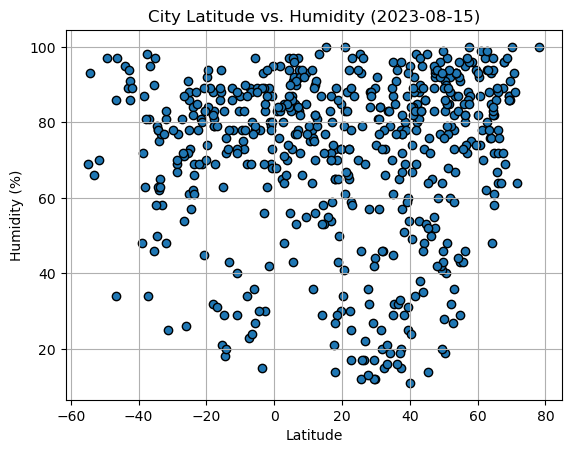

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

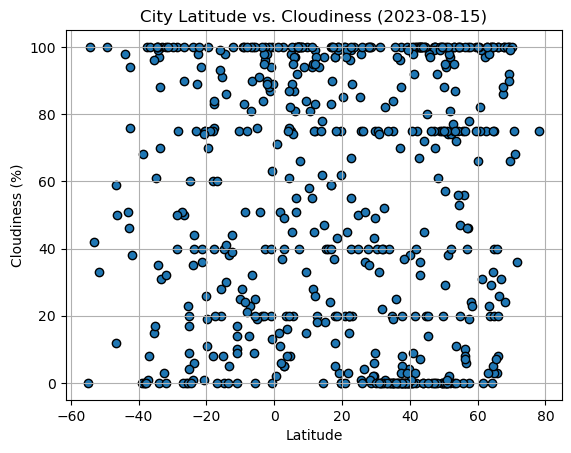

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

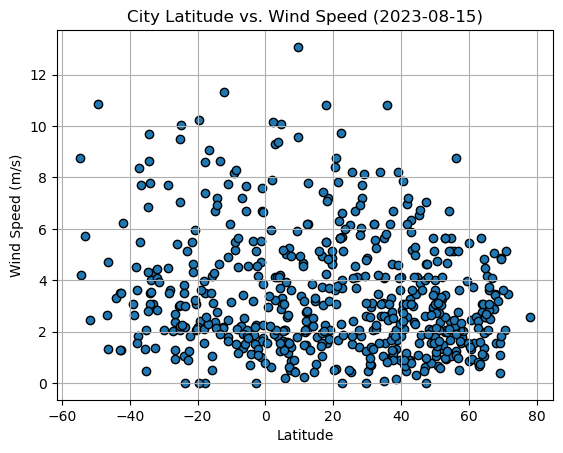

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x_label,y_label,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,copala,16.6500,-98.9833,29.55,70,100,3.75,MX,1692134549
4,iqaluit,63.7506,-68.5145,9.85,76,20,5.66,CA,1692134550
8,bandarbeyla,9.4942,50.8122,24.88,85,33,13.08,SO,1692134552
9,yellowknife,62.4560,-114.3525,19.12,62,75,2.57,CA,1692134553
11,iskateley,67.6803,53.1512,16.03,96,100,3.47,RU,1692134554


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nadi,-17.8000,177.4167,26.00,83,40,0.00,FJ,1692134548
1,adamstown,-25.0660,-130.1015,20.26,61,17,9.51,PN,1692134548
2,afaahiti,-17.7500,-149.2833,25.93,79,83,7.41,PF,1692134549
5,east london,-33.0153,27.9116,15.61,58,100,3.06,ZA,1692134551
6,carnarvon,-24.8667,113.6333,17.85,73,60,10.04,AU,1692134551


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6403547952774797


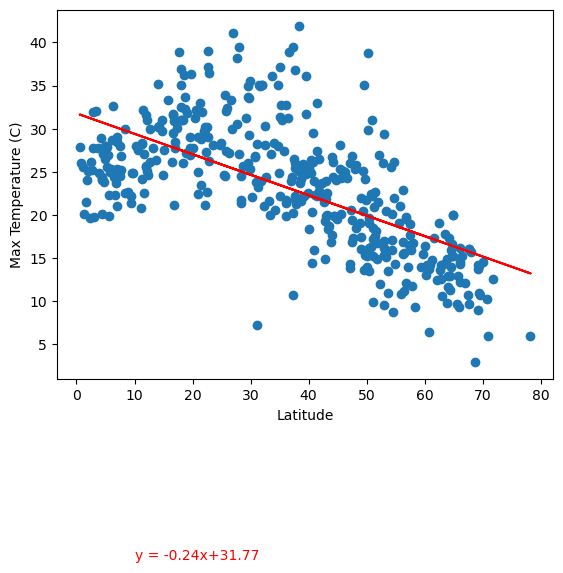

In [15]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

nslope, nyint, nr, _, _= linregress(north_lat, north_temp)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_temp)
plt.plot(north_lat, north_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.text(10,-20, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: 0.8345639331486319


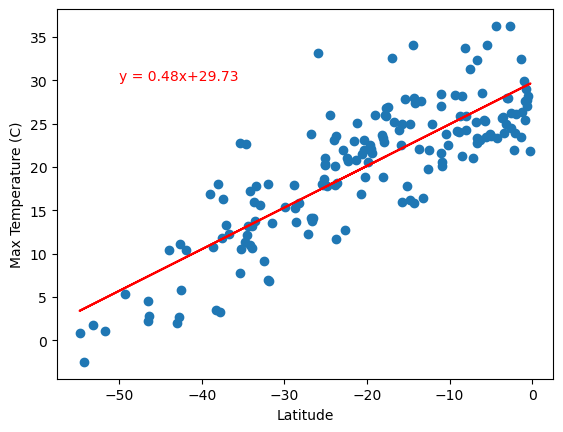

In [16]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

sslope, syint, sr, _, _= linregress(south_lat, south_temp)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_temp)
plt.plot(south_lat, south_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.text(-50,30, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** Since the r-values are high that is an indicators that there is a strong linear relationship between temperature and latitude based on the hemisphere. The temperature goes down as the latitude goes up in the Northern hemisphere. In the Southern hemisphere it is the opposite, the temperature increases as the latitude goes up. The closer the latitude is to the North and South poles the temperature goes down.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09230433261269329


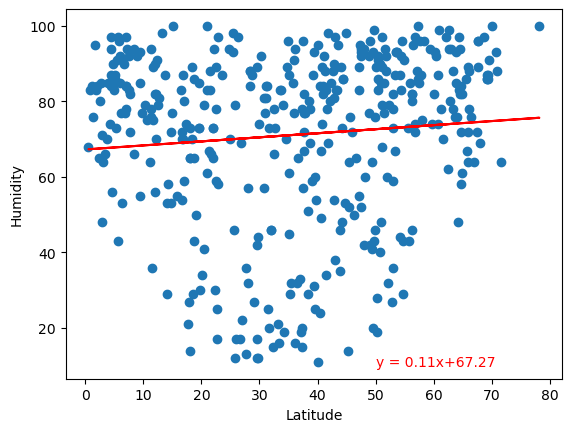

In [17]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_hum = northern_hemi_df["Humidity"]

nslope, nyint, nr, _, _= linregress(north_lat, north_hum)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_hum)
plt.plot(north_lat, north_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(50,10, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: -0.08801548444907571


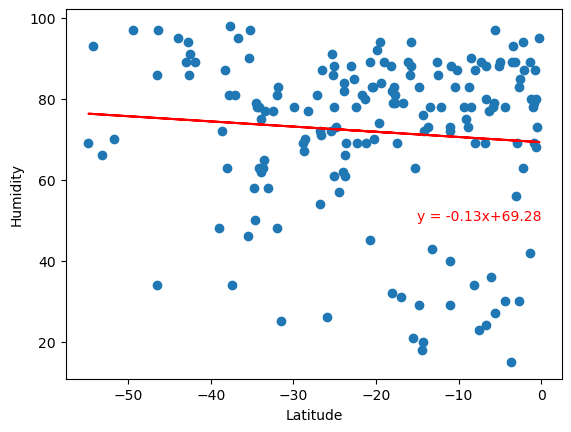

In [18]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_hum = southern_hemi_df["Humidity"]

sslope, syint, sr, _, _= linregress(south_lat, south_hum)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_hum)
plt.plot(south_lat, south_regression, color='red')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-15,50, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** There appears to be a slight correlation present in the data, however there is only a small linear relationship between latitude and humidity. This relationship is not strong as indicated by the low r-values so the correlation is weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.012296018935843983


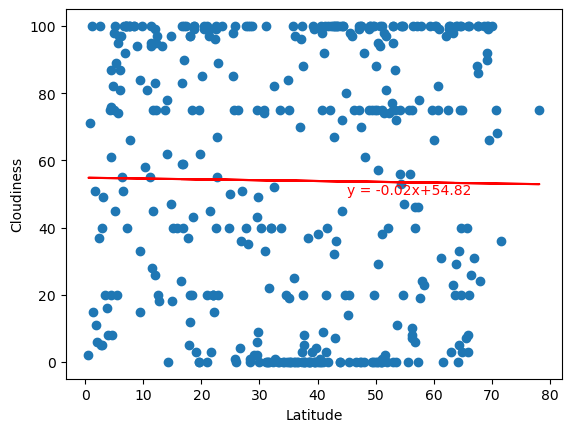

In [19]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_cloud = northern_hemi_df["Cloudiness"]

nslope, nyint, nr, _, _= linregress(north_lat, north_cloud)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_cloud)
plt.plot(north_lat, north_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(45,50, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: 0.07215068288353302


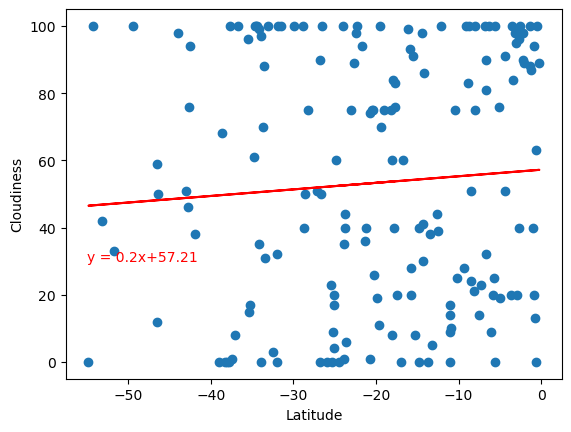

In [20]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloud = southern_hemi_df["Cloudiness"]

sslope, syint, sr, _, _= linregress(south_lat, south_cloud)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_cloud)
plt.plot(south_lat, south_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55,30, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()

**Discussion about the linear relationship:** There is a linear relationship between latitude and cloudiness, this relationship is small. Both of the r-values are small and the Northern hemisphere r-value is extremely small so while the linear regressions do show a linear relationship between latitude and cloudiness. The r-values suggest the relationships are weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16415449214938388


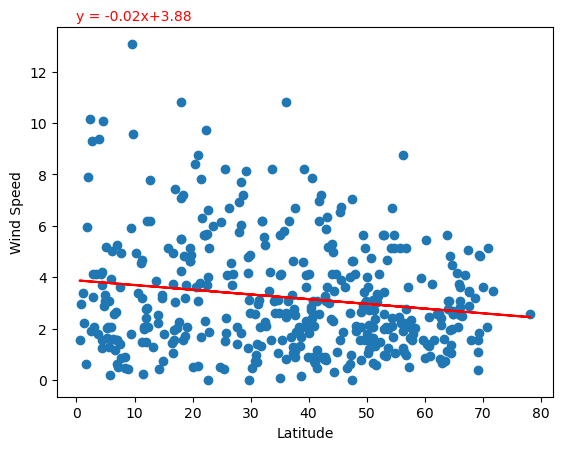

In [21]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_wind = northern_hemi_df["Wind Speed"]

nslope, nyint, nr, _, _= linregress(north_lat, north_wind)
north_regression = nslope*(north_lat)+ nyint

print(f"The r-value is: {nr}")

plt.scatter(north_lat, north_wind)
plt.plot(north_lat, north_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(0,14, f"y = {round(nslope,2)}x+{round(nyint,2)}", color='red')

plt.show()

The r-value is: -0.10230782059463336


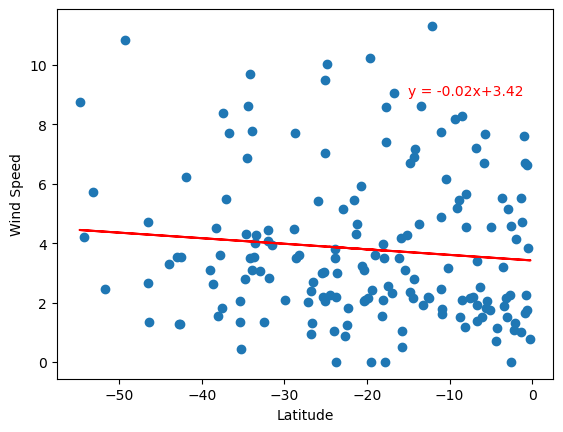

In [22]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_wind = southern_hemi_df["Wind Speed"]

sslope, syint, sr, _, _= linregress(south_lat, south_wind)
south_regression = sslope*(south_lat)+ syint

print(f"The r-value is: {sr}")

plt.scatter(south_lat, south_wind)
plt.plot(south_lat, south_regression, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-15,9, f"y = {round(sslope,2)}x+{round(syint,2)}", color='red')

plt.show()